Dataset 1  - Training Data - Accuracy with k=1 100.0
Dataset 1  - Training Data - Accuracy with k=7 100.0
Dataset 1  - Training Data - Accuracy with k=15 100.0
Dataset 1  - Validation Data - Accuracy with k=1 100.0
Dataset 1  - Validation Data - Accuracy with k=7 100.0
Dataset 1  - Validation Data - Accuracy with k=15 100.0
Dataset 1  - Test Data - Accuracy with k=1 100.0
Dataset 1  - Test Data - Accuracy with k=7 100.0
Dataset 1  - Test Data - Accuracy with k=15 100.0


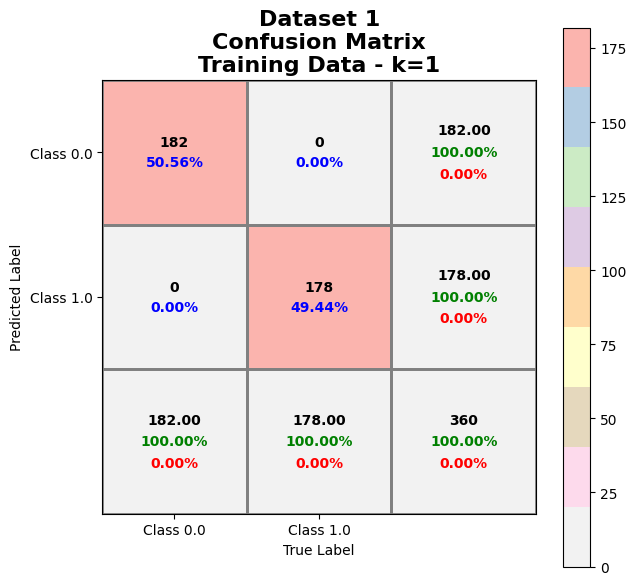

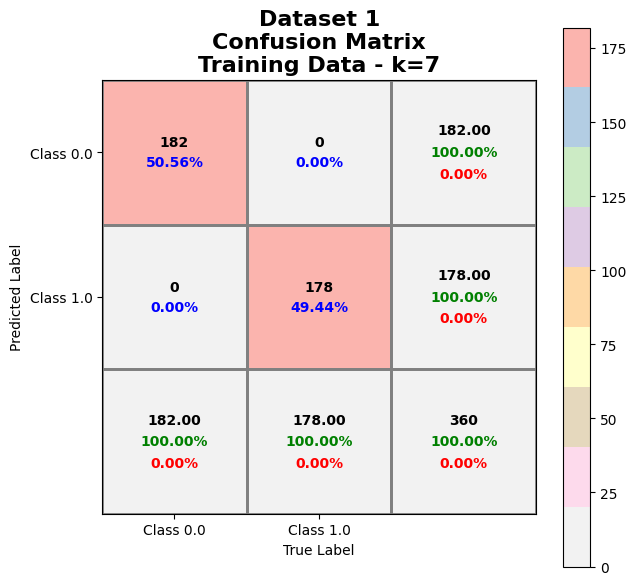

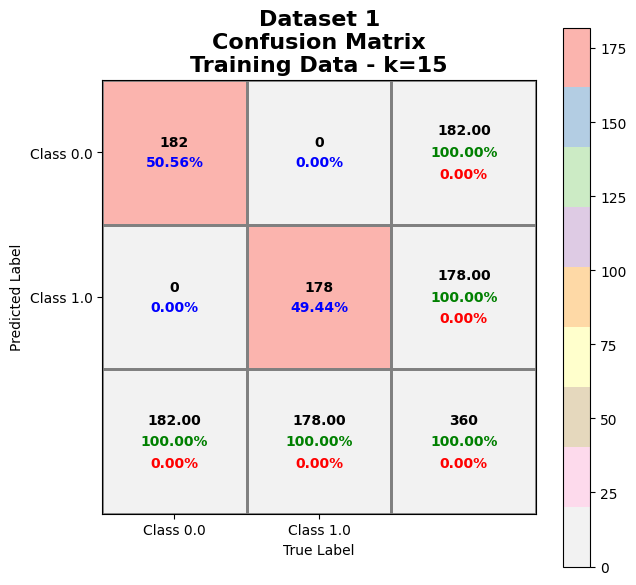

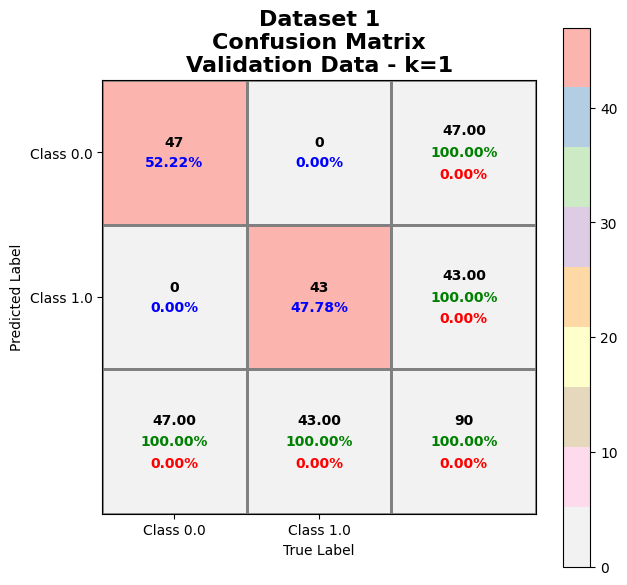

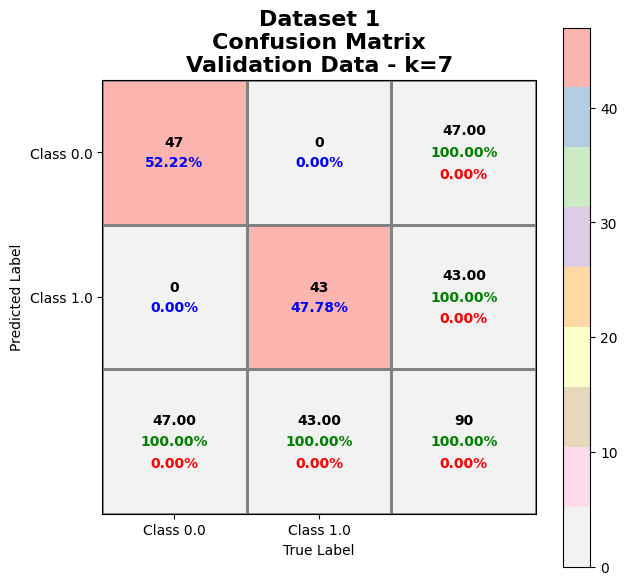

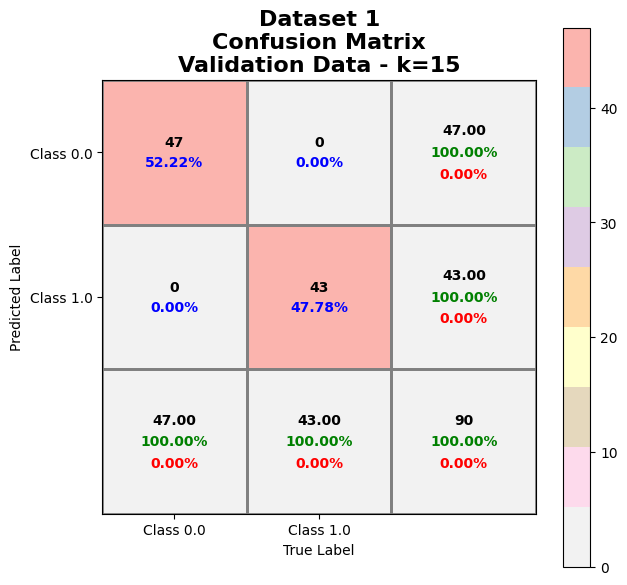

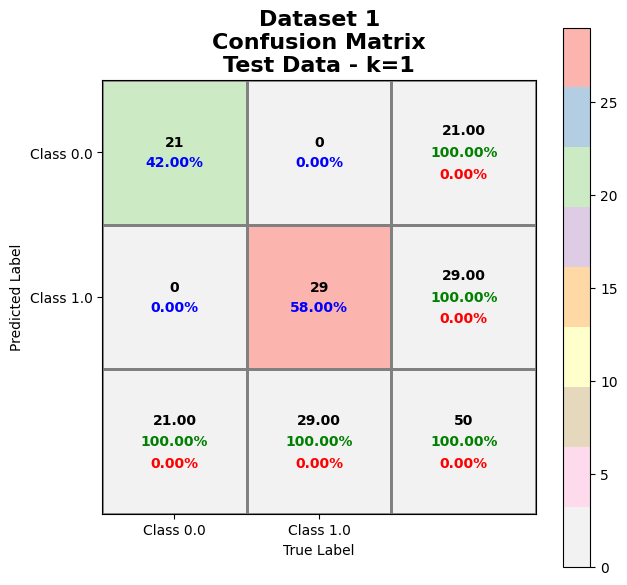

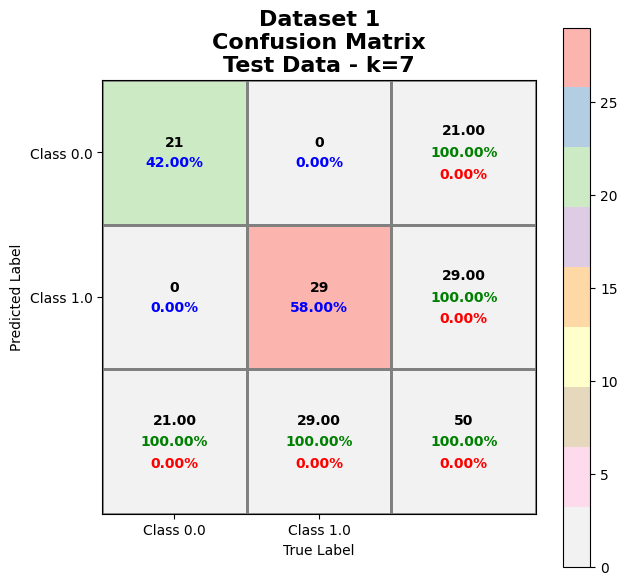

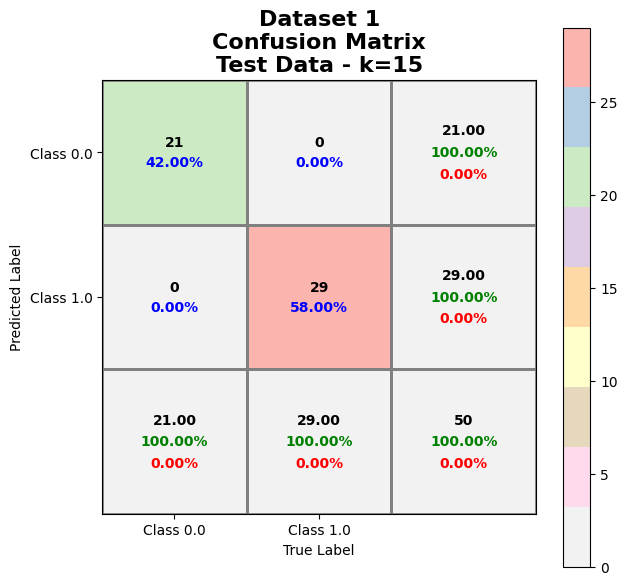

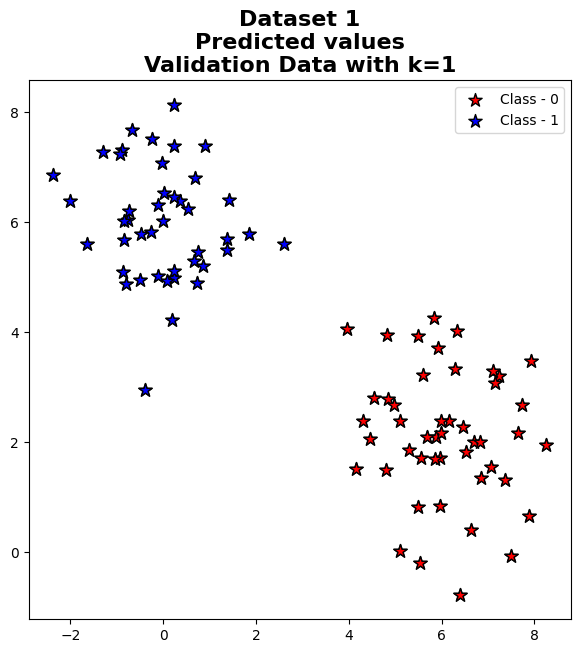

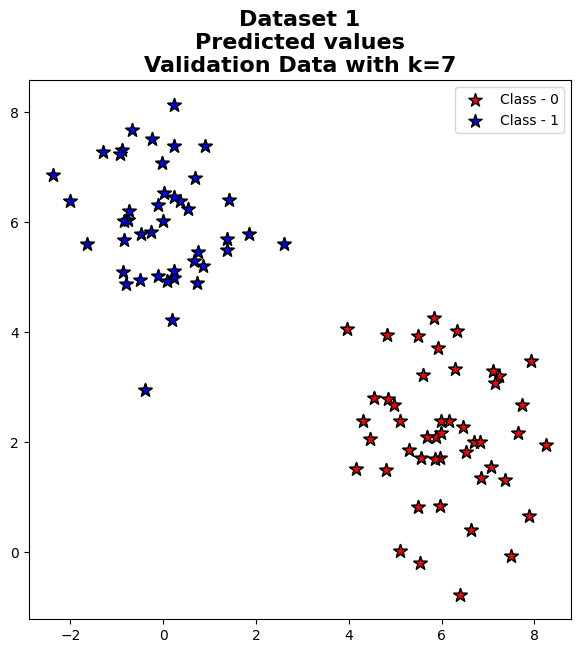

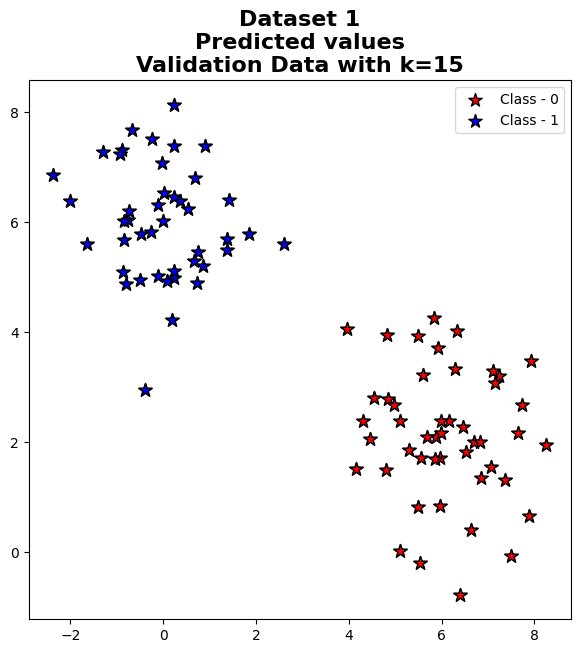

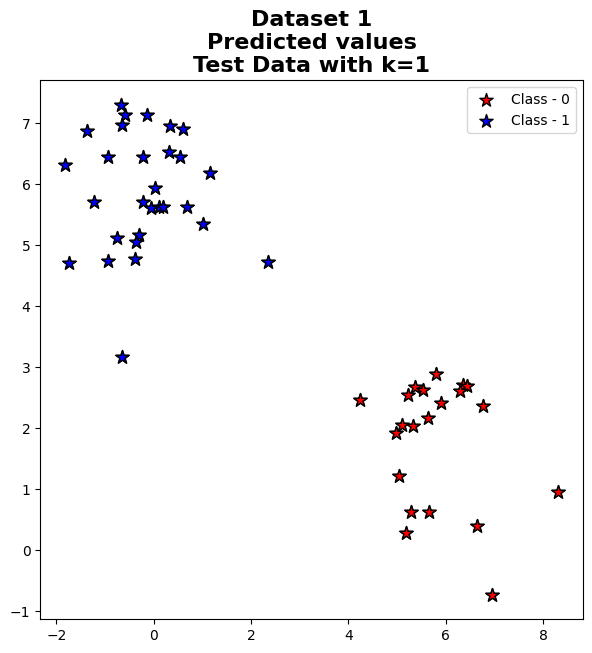

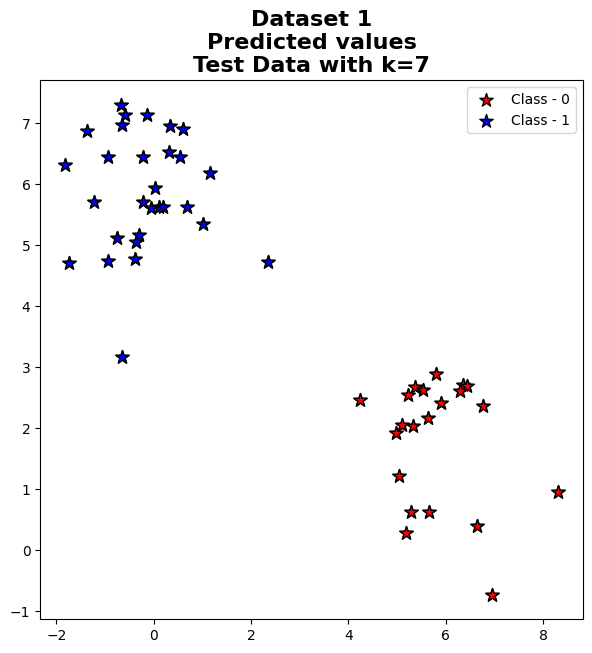

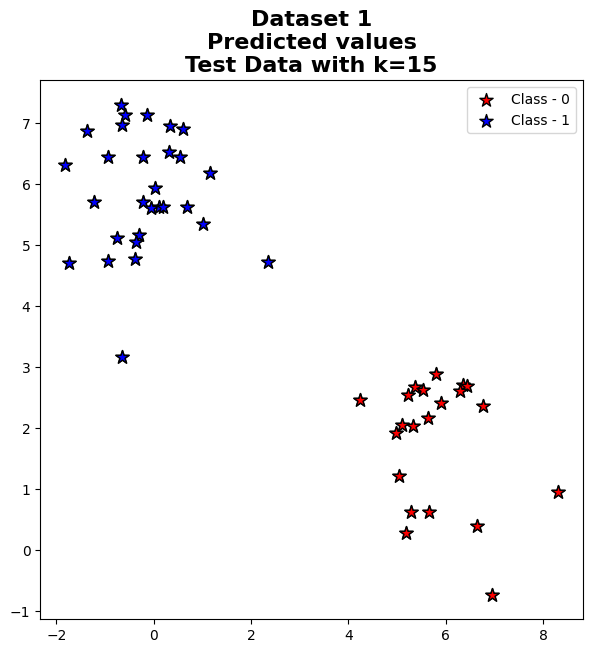

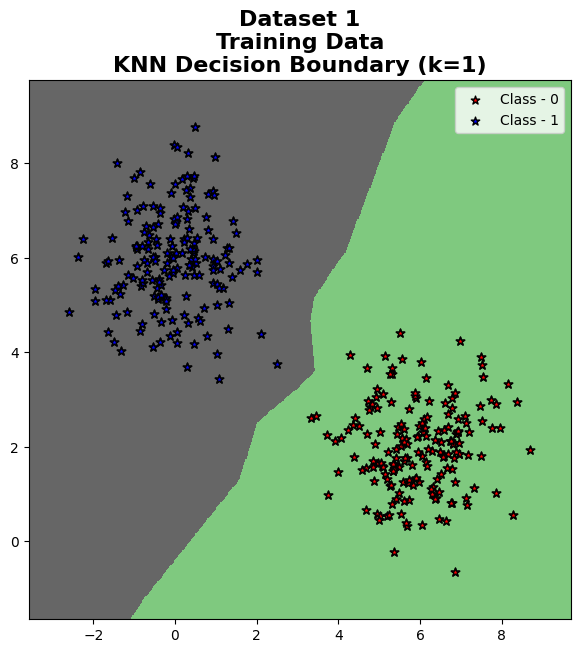

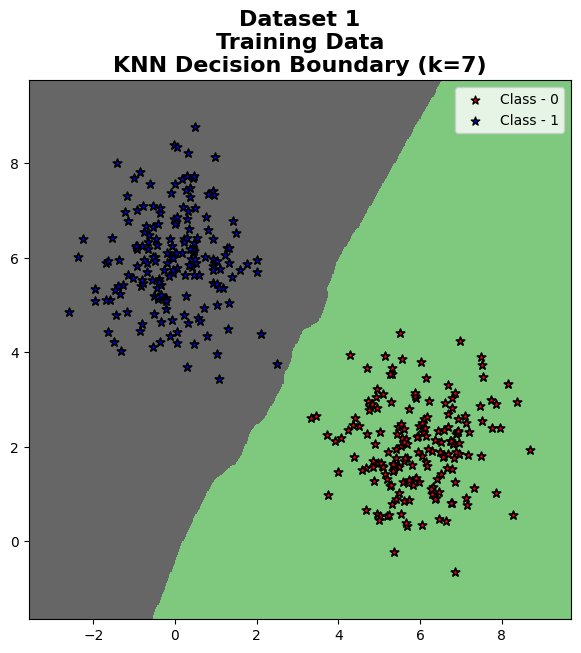

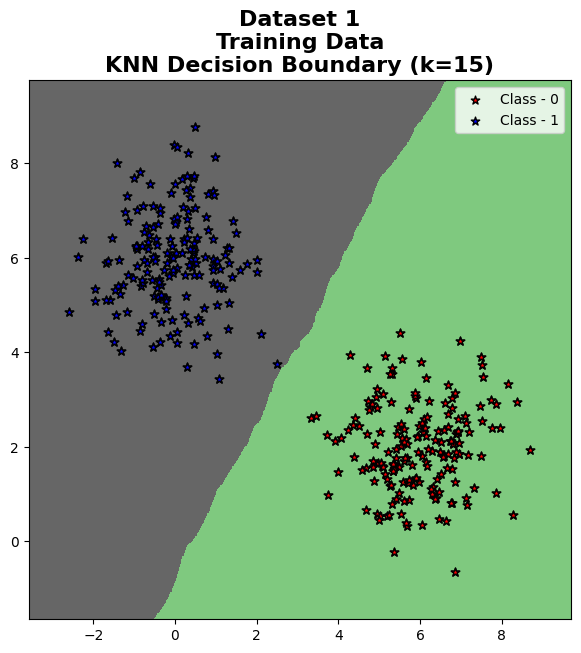

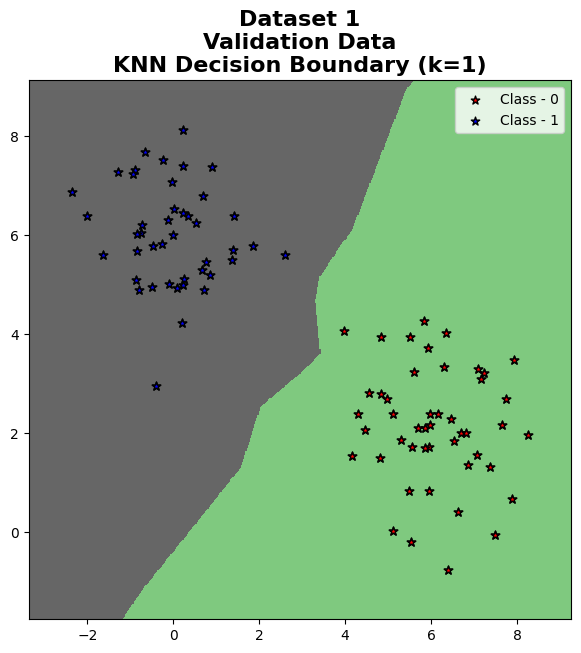

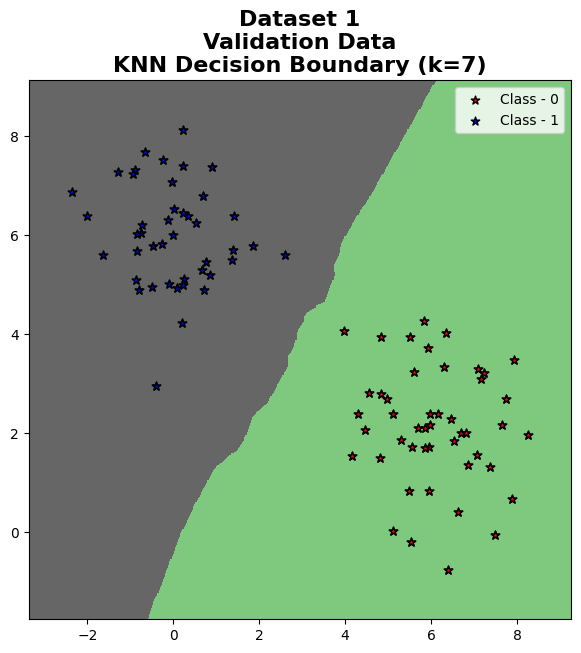

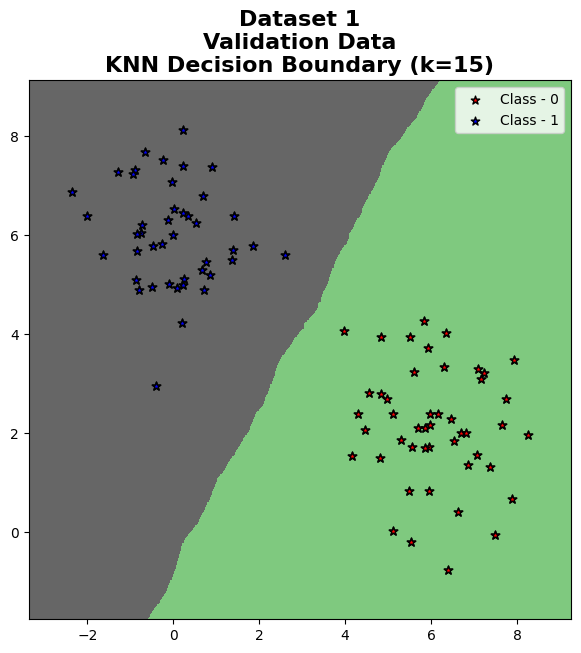

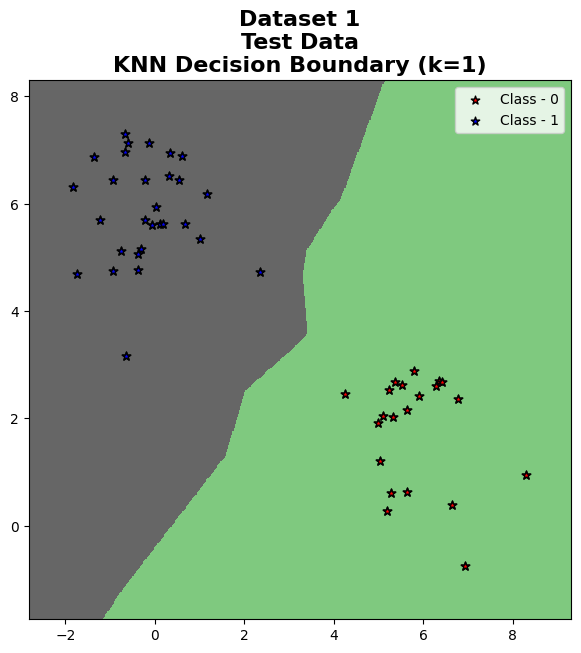

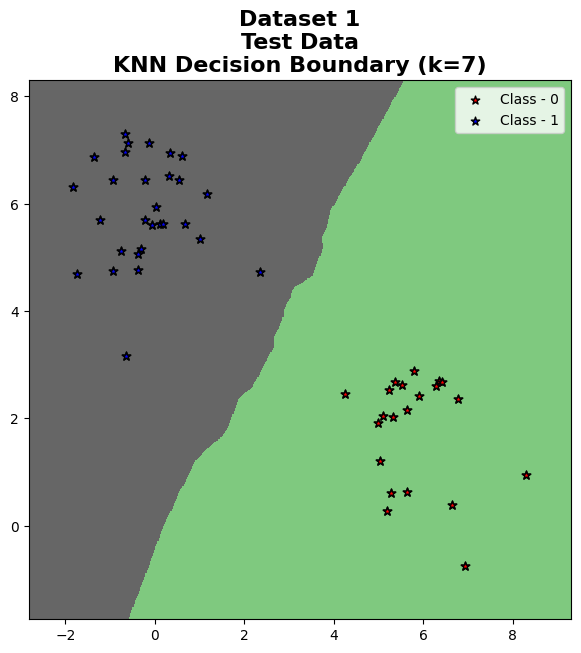

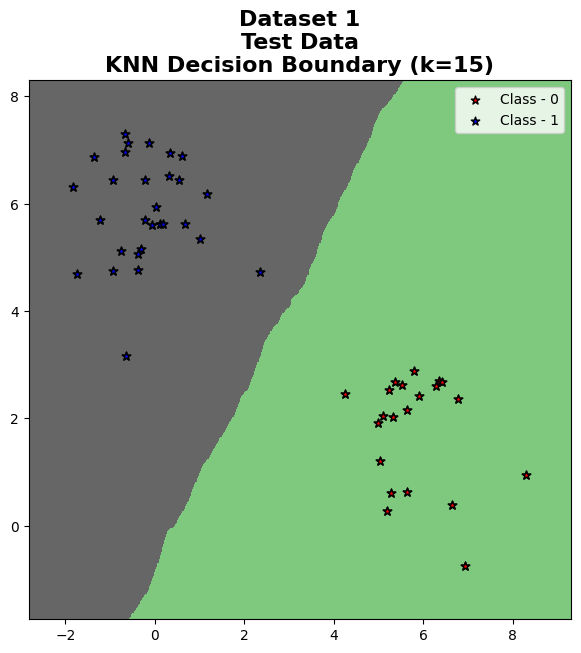

Dataset 2  - Training Data - Accuracy with k=1 100.0
Dataset 2  - Training Data - Accuracy with k=7 100.0
Dataset 2  - Training Data - Accuracy with k=15 99.8812351543943
Dataset 2  - Validation Data - Accuracy with k=1 100.0
Dataset 2  - Validation Data - Accuracy with k=7 99.57983193277312
Dataset 2  - Validation Data - Accuracy with k=15 99.57983193277312
Dataset 2  - Test Data - Accuracy with k=1 100.0
Dataset 2  - Test Data - Accuracy with k=7 100.0
Dataset 2  - Test Data - Accuracy with k=15 99.16666666666667


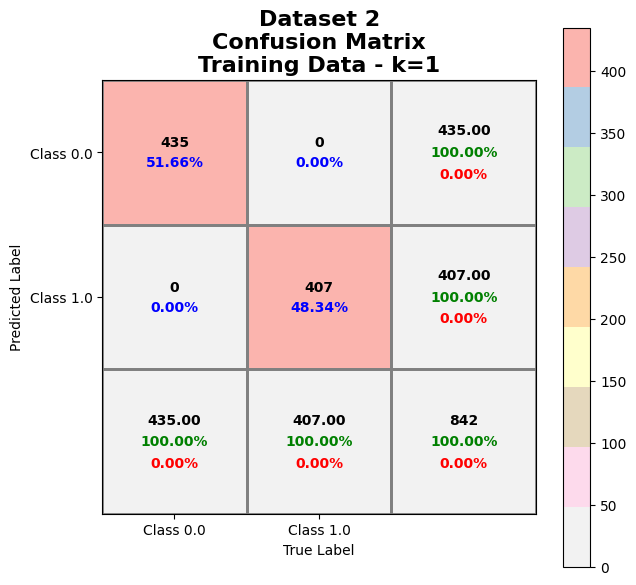

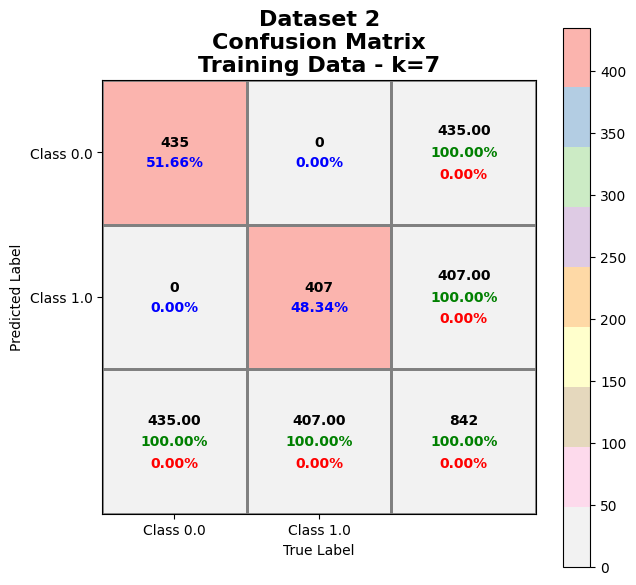

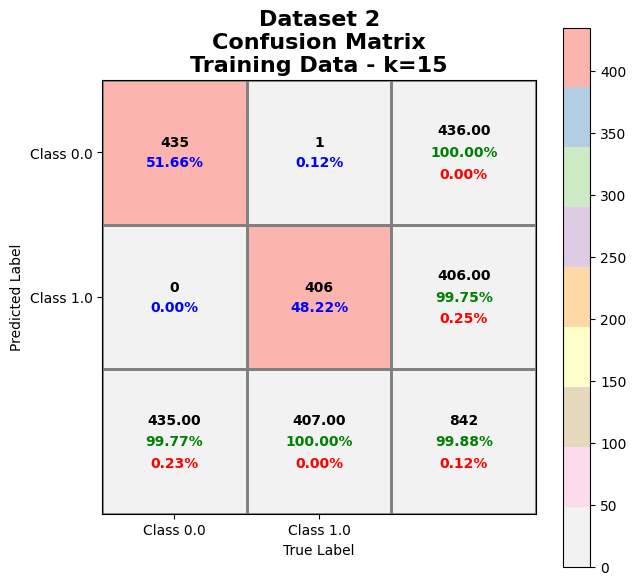

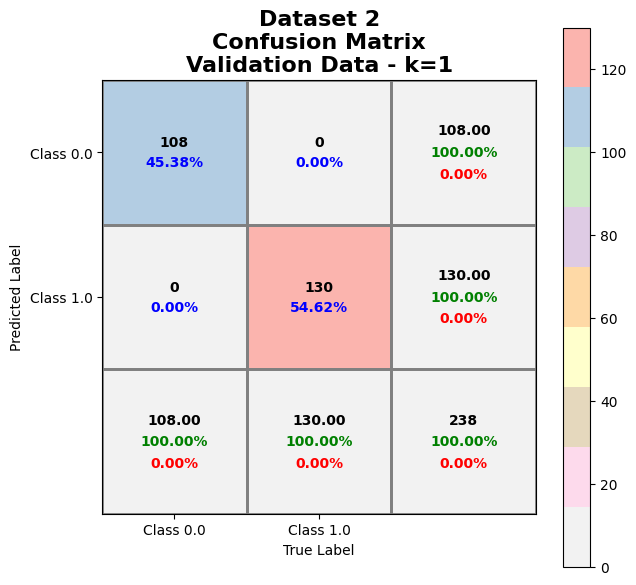

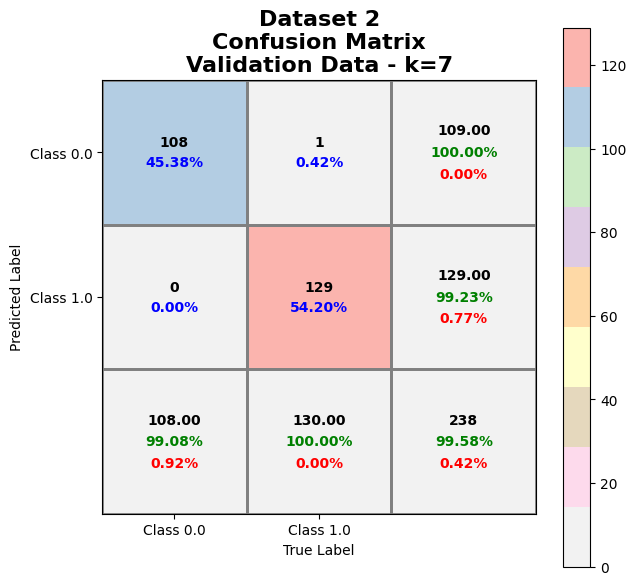

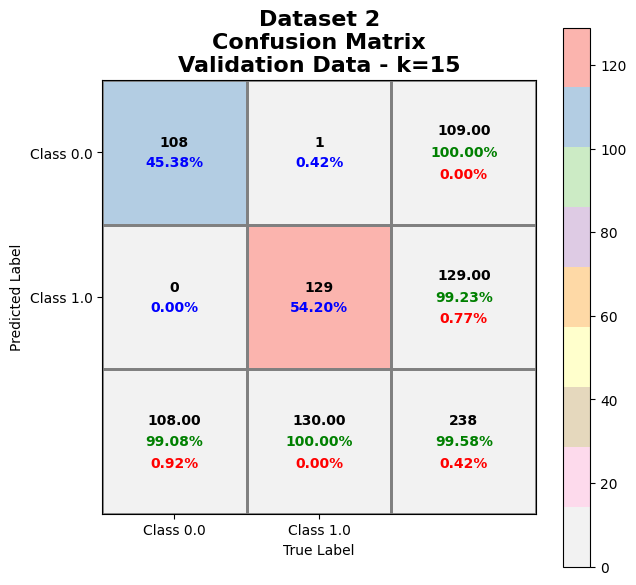

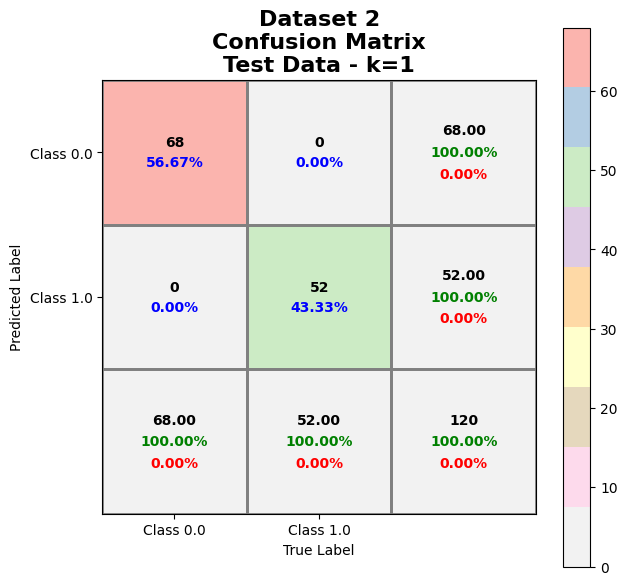

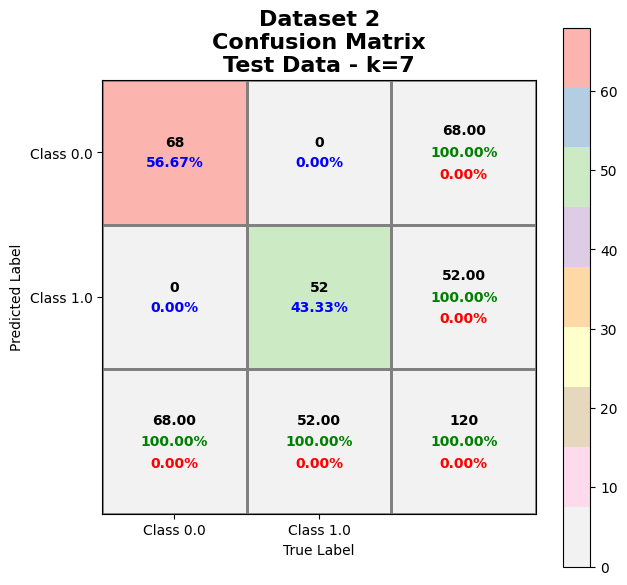

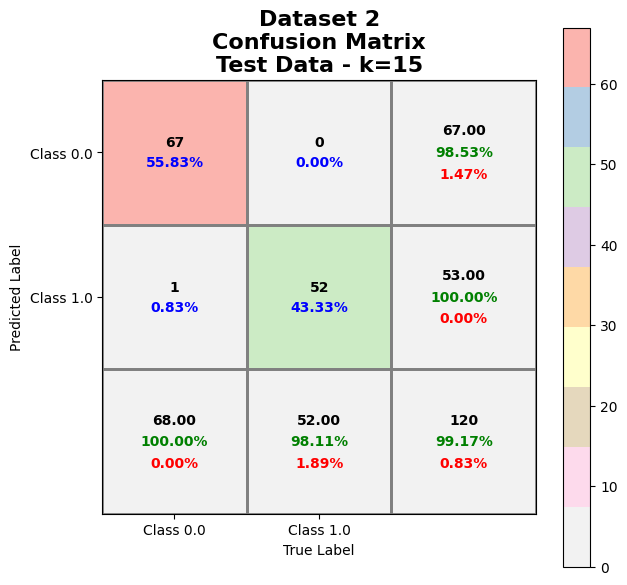

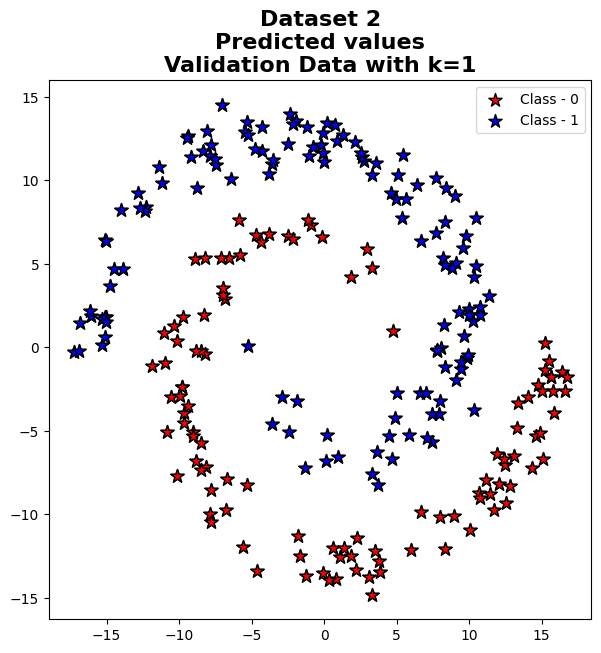

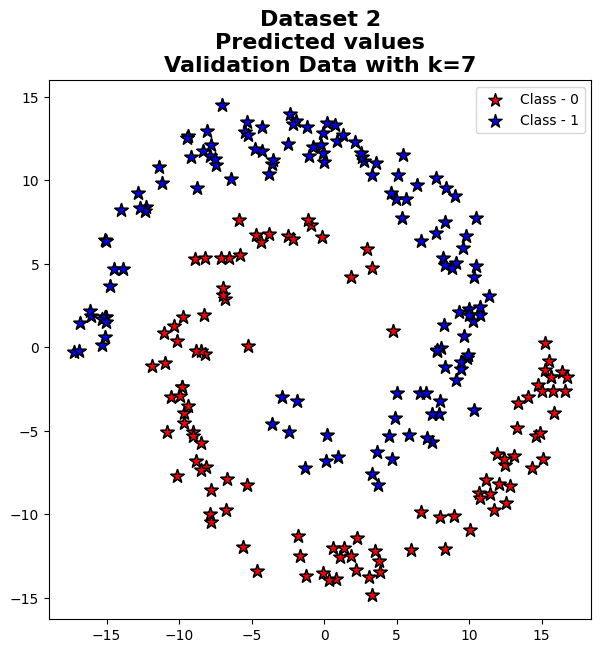

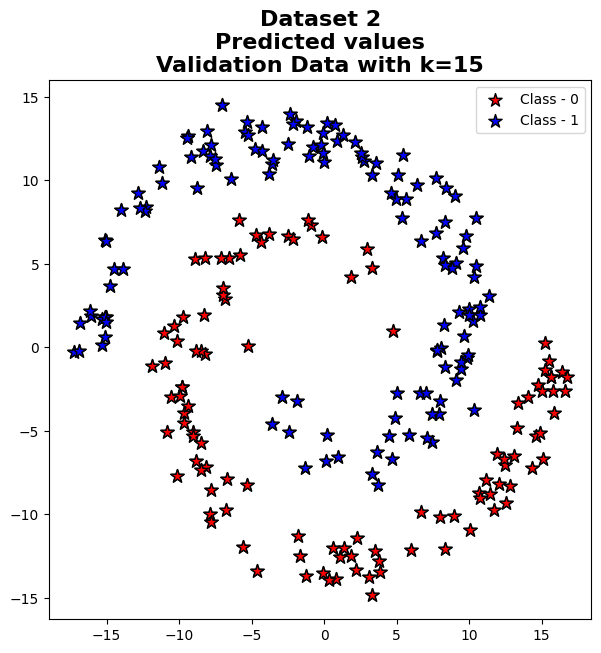

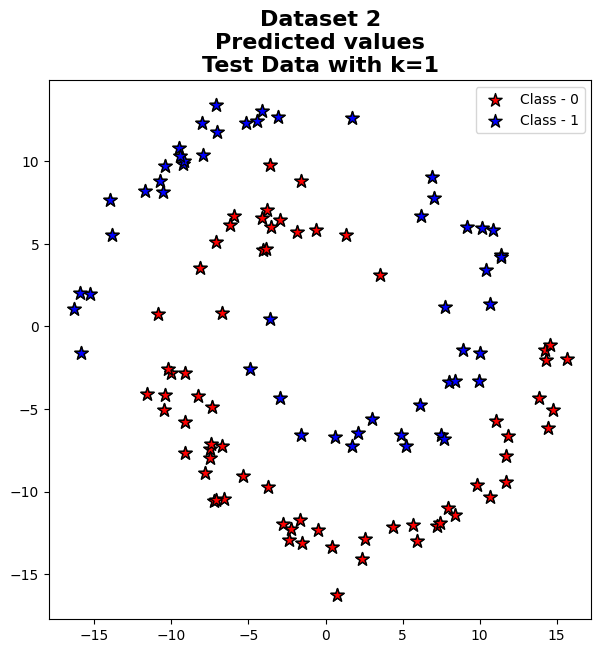

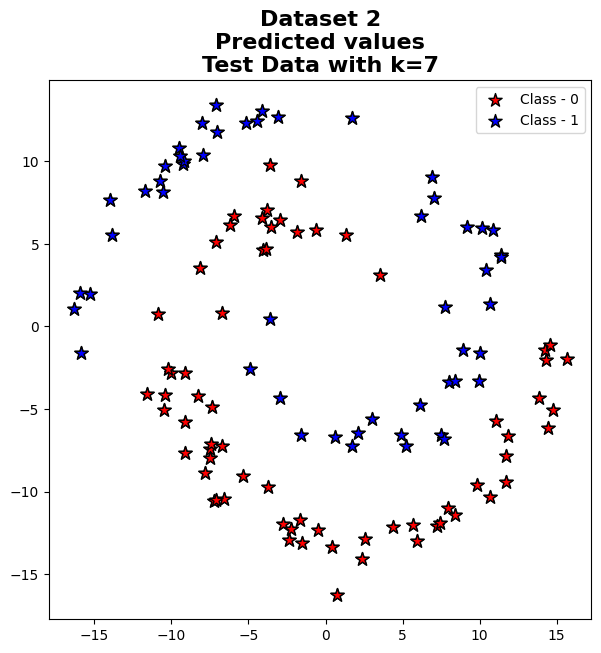

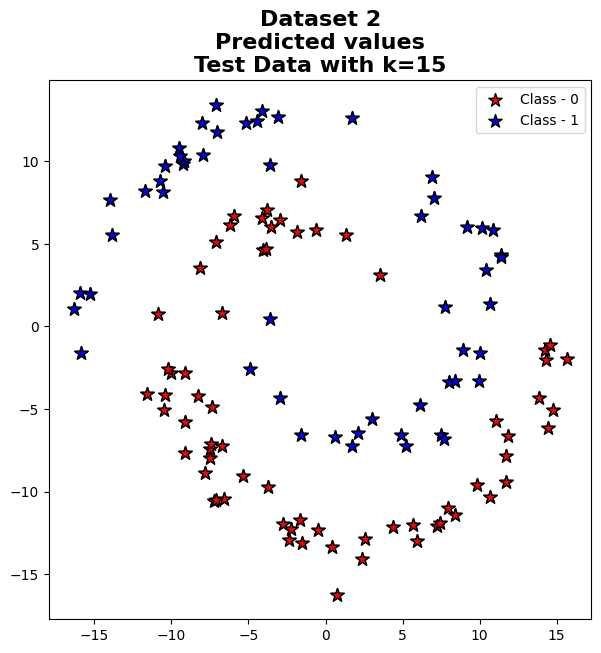

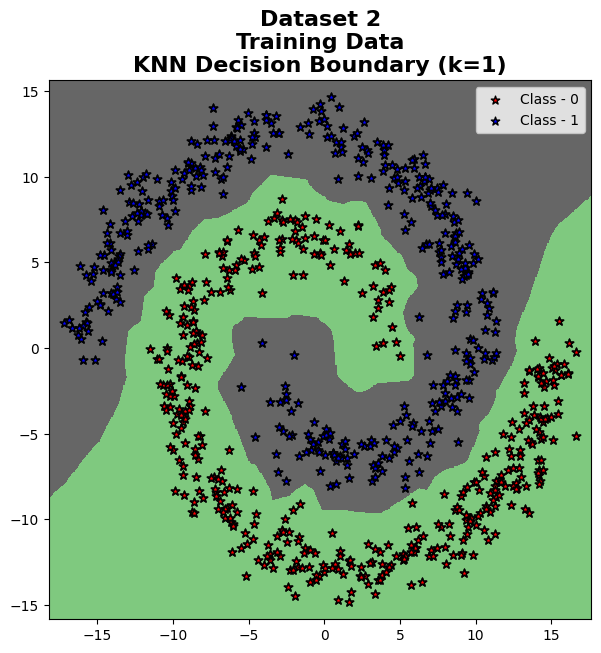

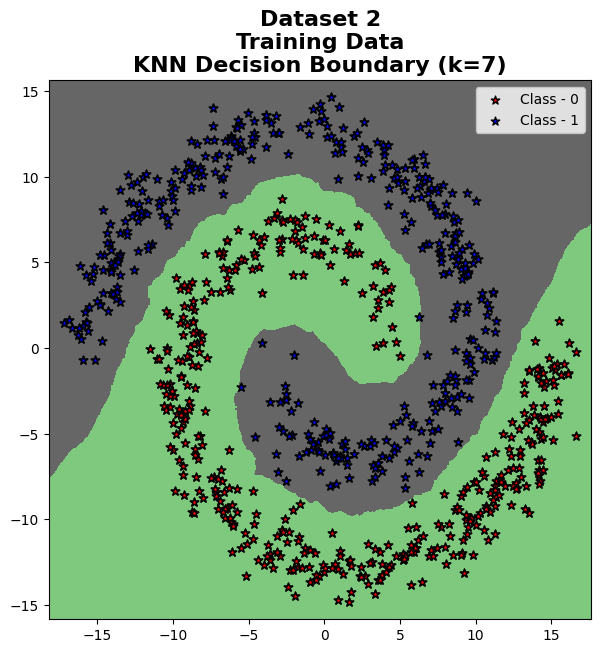

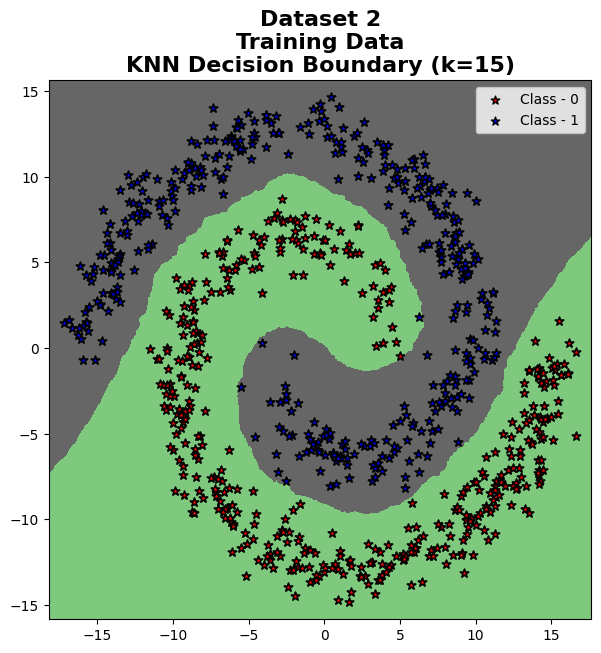

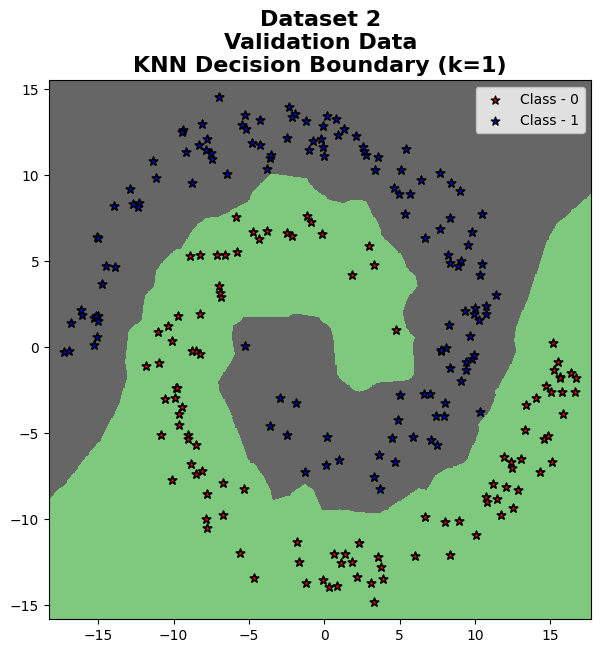

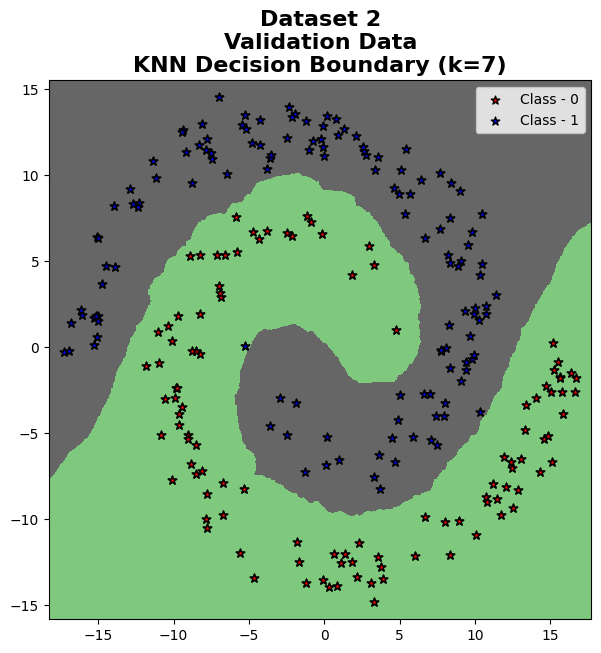

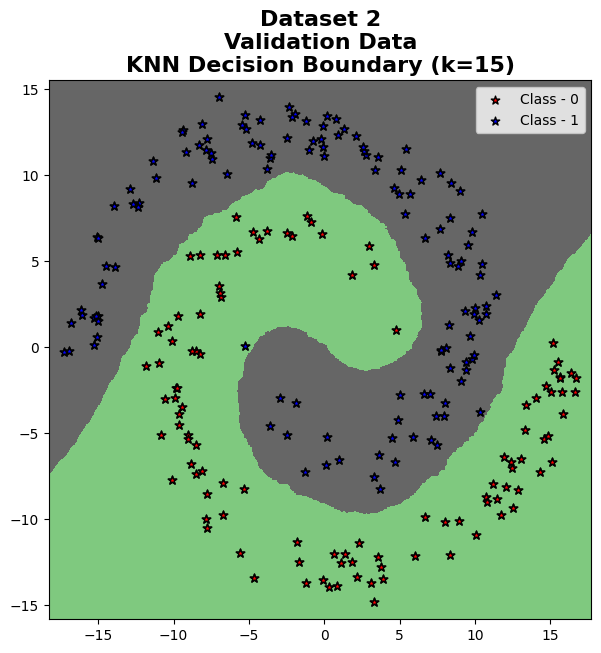

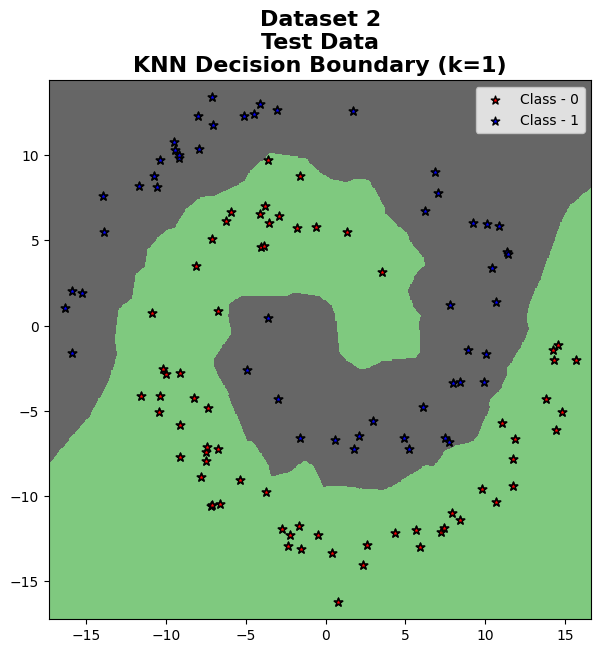

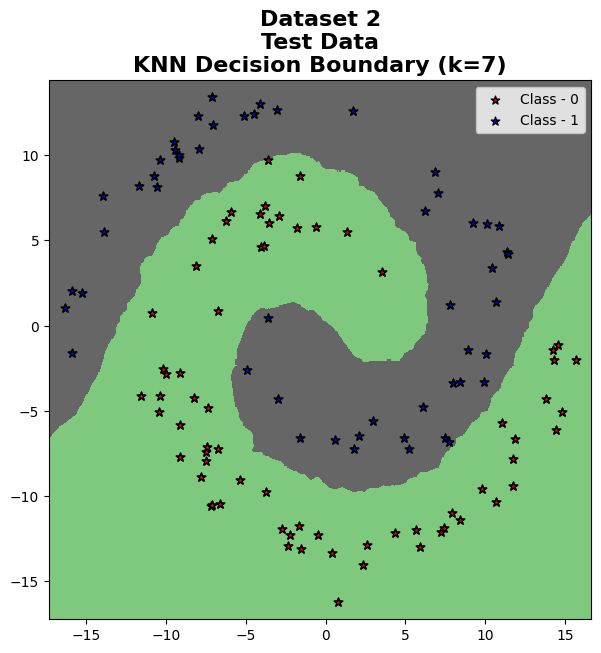

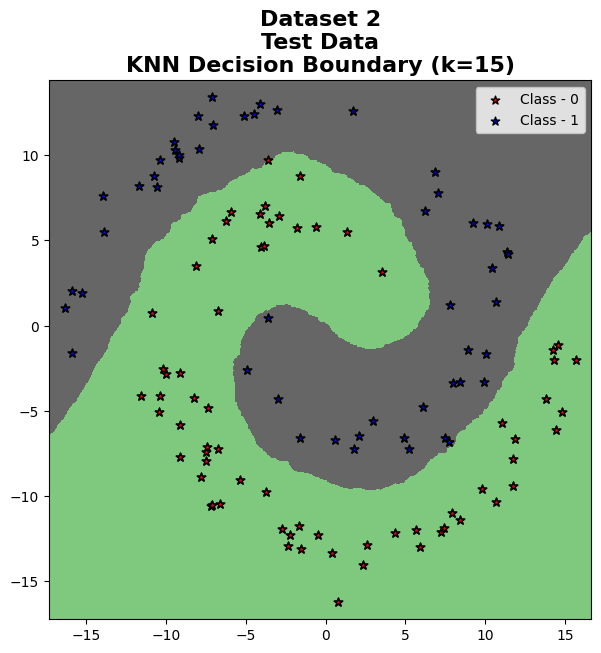

Dataset 3  - Training Data - Accuracy with k=1 100.0
Dataset 3  - Training Data - Accuracy with k=7 73.56387539296942
Dataset 3  - Training Data - Accuracy with k=15 69.59131180337239
Dataset 3  - Validation Data - Accuracy with k=1 59.05905905905906
Dataset 3  - Validation Data - Accuracy with k=7 61.46146146146146
Dataset 3  - Validation Data - Accuracy with k=15 63.36336336336337
Dataset 3  - Test Data - Accuracy with k=1 51.903807615230455
Dataset 3  - Test Data - Accuracy with k=7 62.124248496993985
Dataset 3  - Test Data - Accuracy with k=15 63.126252505010015


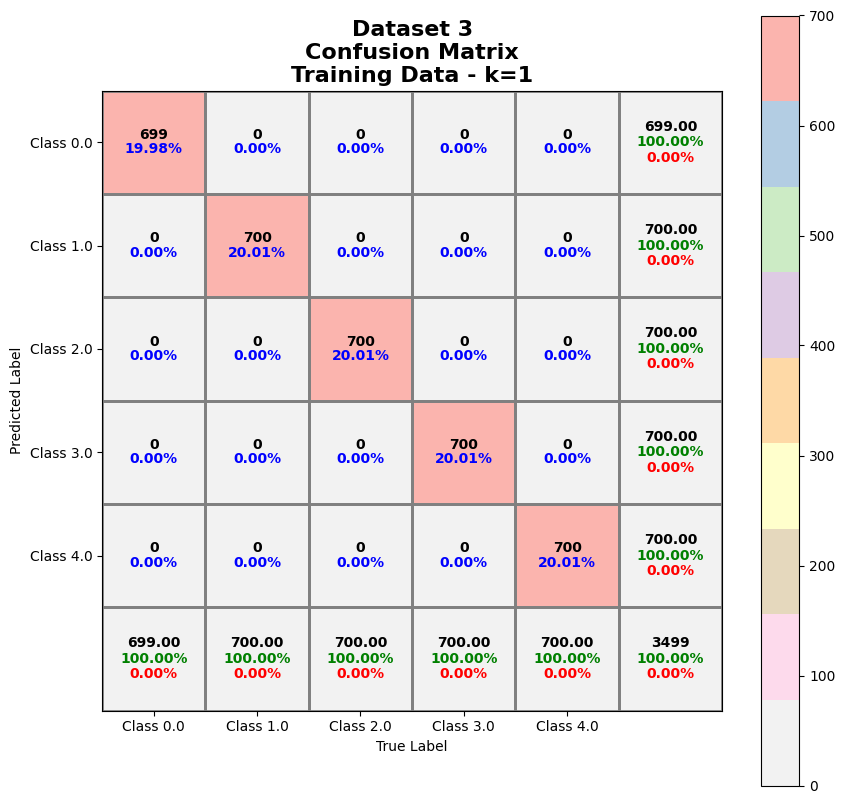

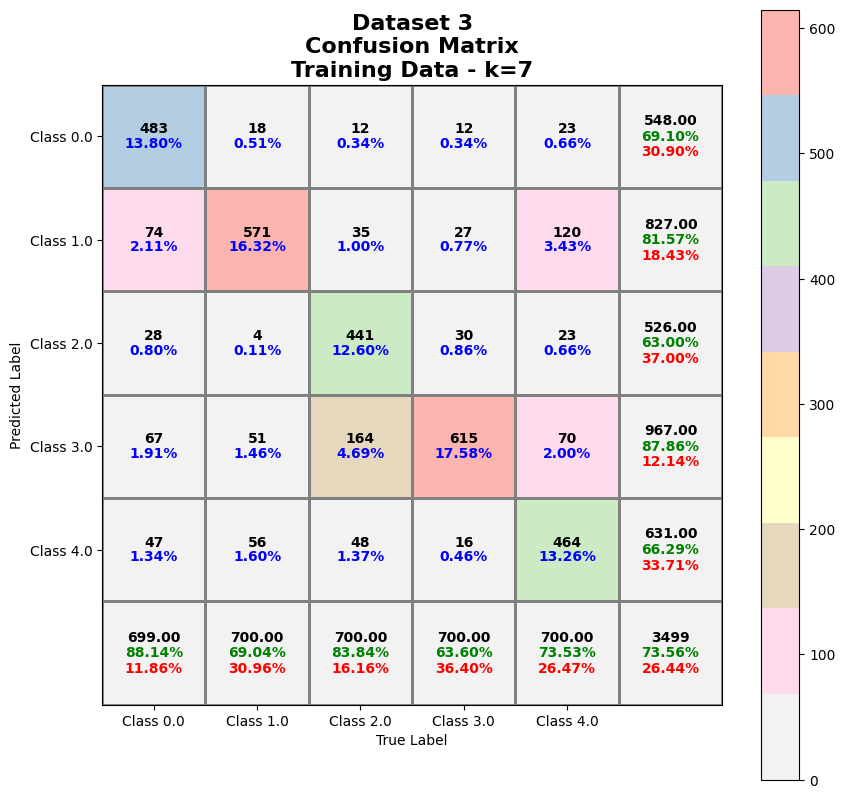

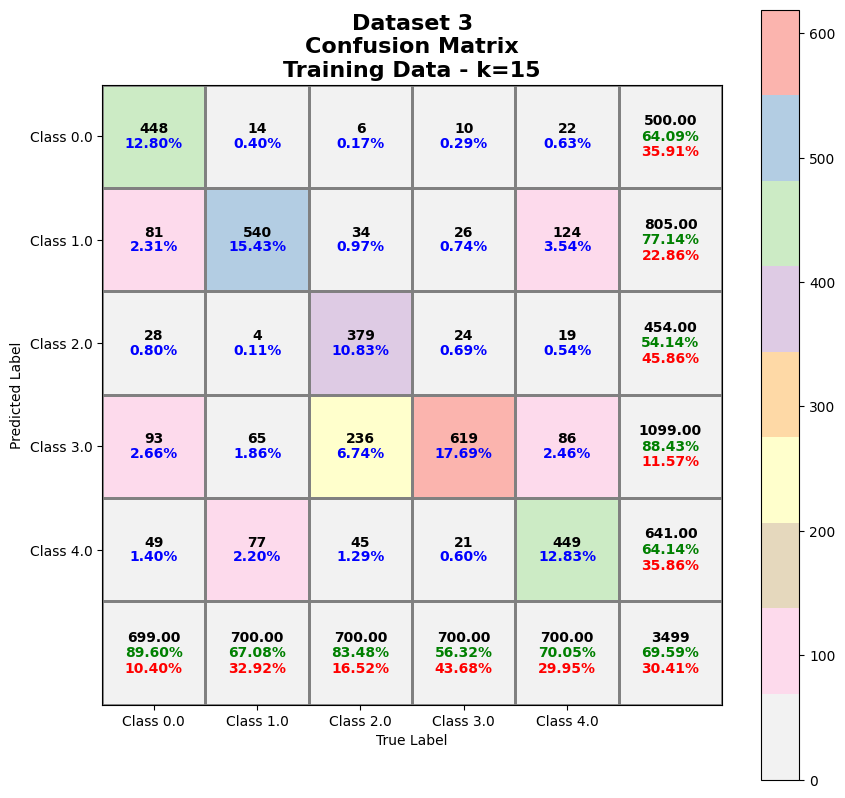

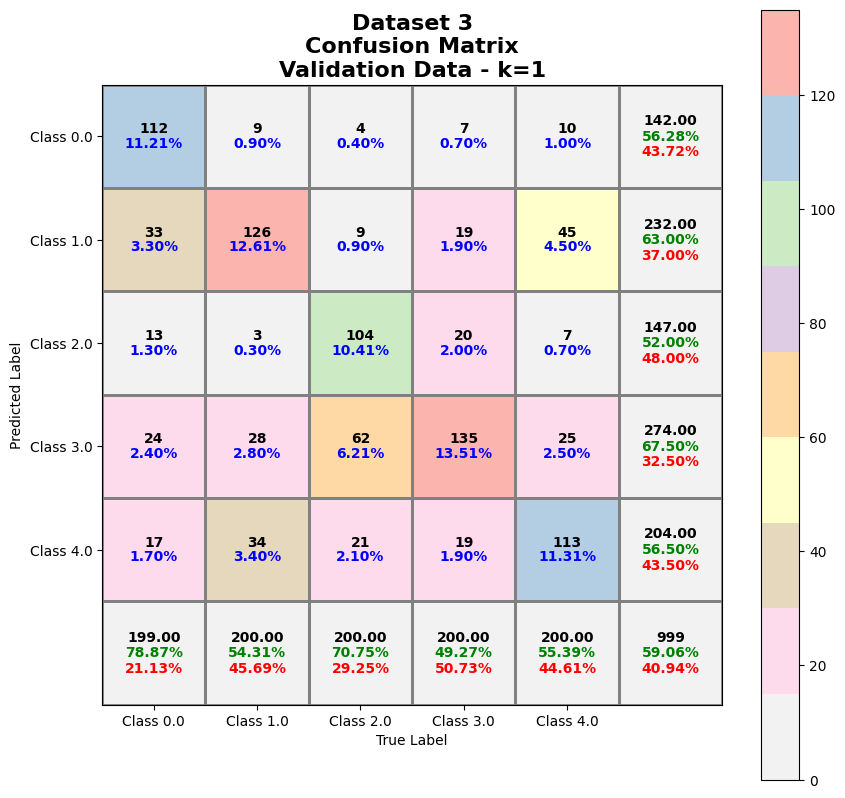

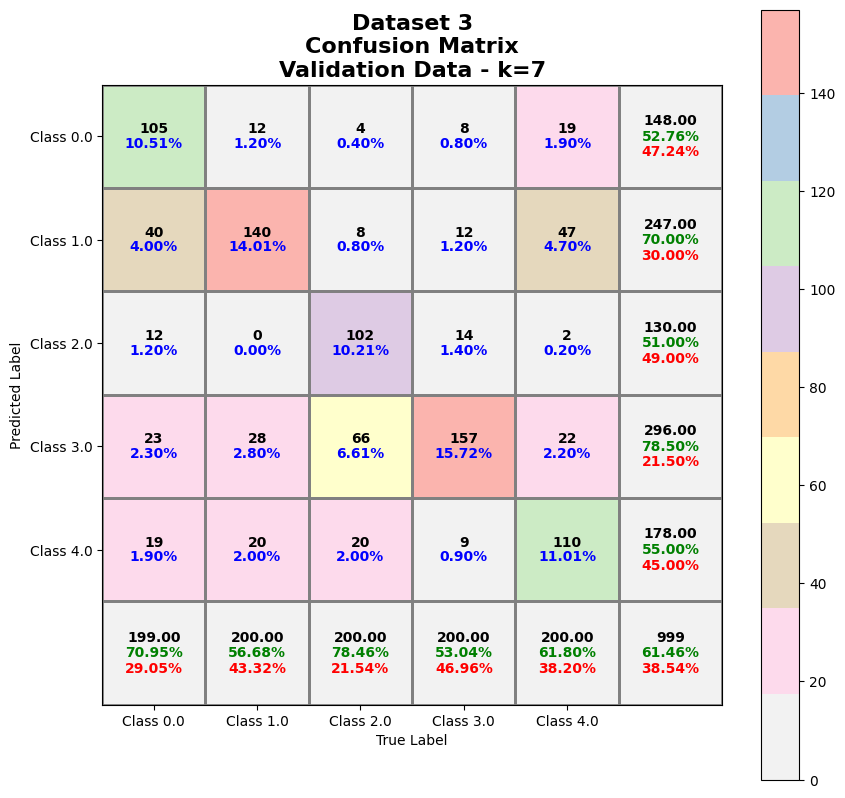

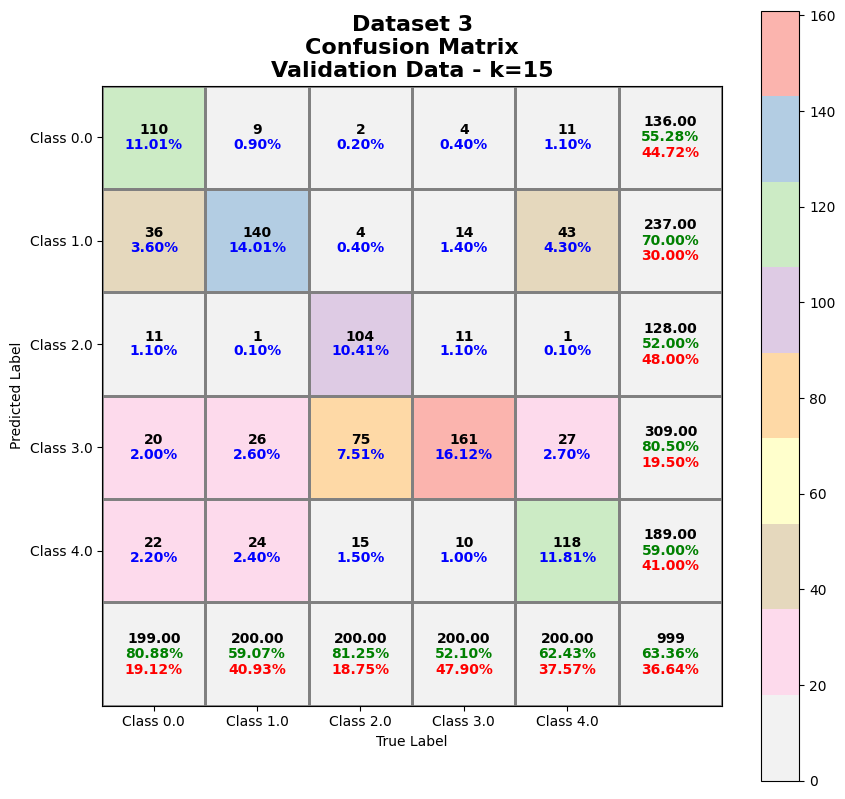

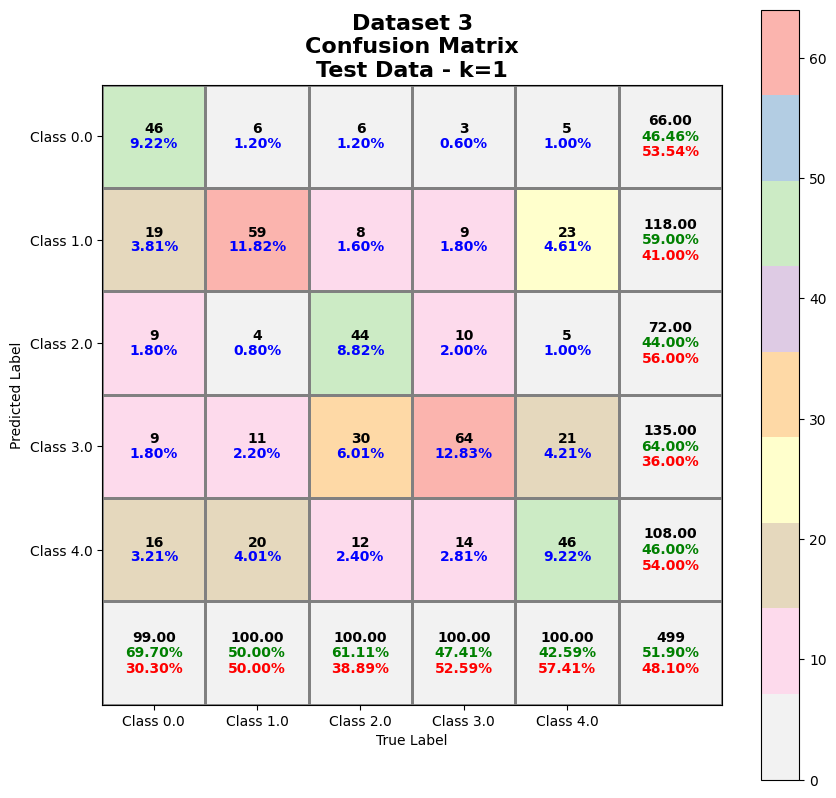

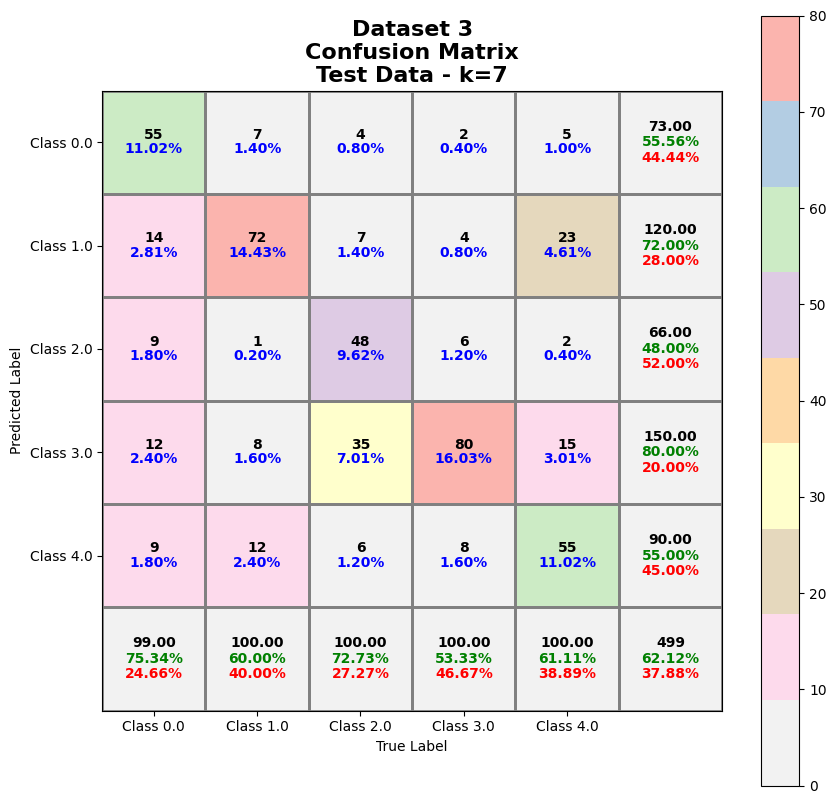

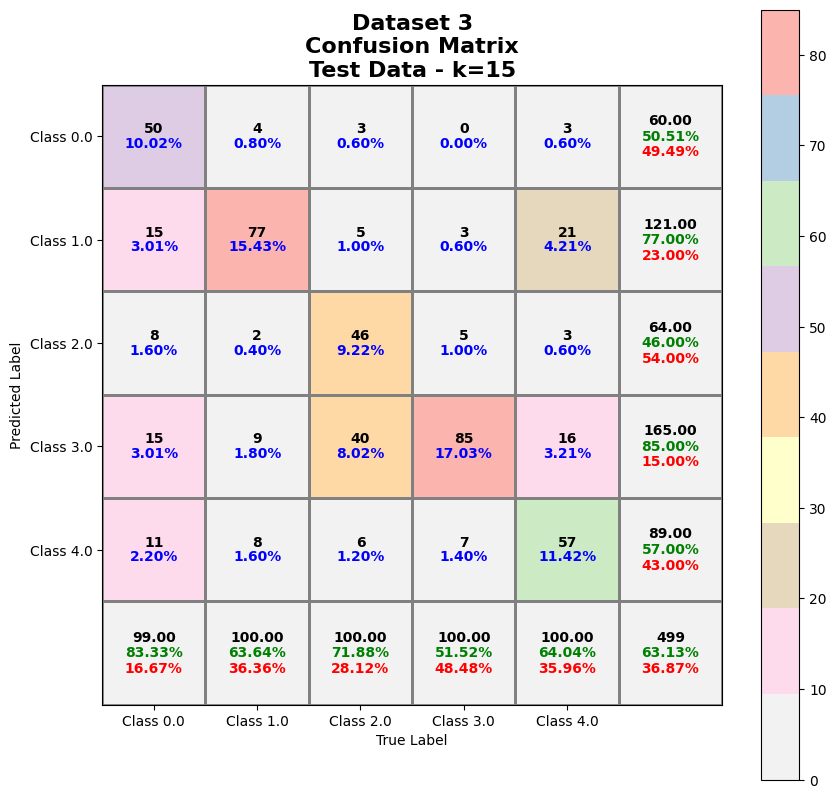

In [3]:
"""
Task 1. 
    Input -
        Datasets_for_A1 folder needs to be in the current working 
        directory with the folder structure as 
        Datasets_for_A1/Classification/Dataset <dataset number>/<team number>/
        Replace <team number> with the actual number.
        e.g. Datasets_for_A1/Classification/Dataset 1/9/
    Output -
        K-nearest neighbours classifier, for K=1, K=7 and K=15
        Presentation of Results:
            1. Table of classification accuracies of the model on training 
            data and validation data for different values of hyperparameter
            2. Classification accuracy of the best configuration of the 
            model on test data
            3. Confusion matrix for the best configuration of the model,
            on training data and test data
"""

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


class KNNClassifier:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
            nearest_indices = np.argsort(distances)[: self.n_neighbors]
            nearest_labels = [self.y_train[i] for i in nearest_indices]
            pred_label = max(set(nearest_labels), key=nearest_labels.count)
            y_pred.append(pred_label)

        return y_pred


def accuracy_score(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("Lengths of y_true and y_pred must be equal")

    num_correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    accuracy = num_correct / len(y_true)

    return accuracy


def confusion_matrix(y_true, y_pred, accuracy, labels=None):
    if labels is None:
        labels = np.unique(np.concatenate((y_true, y_pred)))
    num_labels = len(labels)
    cm = np.zeros((num_labels + 1, num_labels + 1), float)
    label_to_index = {label: i for i, label in enumerate(labels)}
    true_positives = np.zeros(num_labels)
    pred_positives = np.zeros(num_labels)
    total_samples = len(y_true)
    for true, pred in zip(y_true, y_pred):
        true_index = label_to_index[true]
        pred_index = label_to_index[pred]
        cm[true_index, pred_index] += 1
        true_positives[true_index] += 1 if true == pred else 0
        pred_positives[pred_index] += 1 if true == pred else 0
    cm = cm.T
    accuracy = np.sum(np.diag(cm)) / total_samples
    cm[-1, :-1] = (true_positives / np.sum(cm[:-1, :-1], axis=1)) * 100
    cm[:-1, -1] = (pred_positives / np.sum(cm[:-1, :-1], axis=0)) * 100
    cm[-1, -1] = accuracy * 100
    return cm


def plot_confusion_matrix(y_true, y_pred, accuracy, title):
    cm = confusion_matrix(y_true, y_pred, accuracy)
    cm_backup = confusion_matrix(y_true, y_pred, accuracy)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i == cm.shape[0] - 1 or j == cm.shape[1] - 1:
                cm[i, j] = 0.0
    number_of_classes = len(np.unique(y_true))
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Pastel1_r)
    cm = cm_backup
    plt.title(title, fontsize=16, weight='bold')
    plt.colorbar()
    labels = []
    for i in np.unique(y_true):
        label = "Class " + str(i)
        labels.append(label)
    plt.xticks(range(len(np.unique(y_true))), labels=labels)
    plt.yticks(range(len(np.unique(y_true))), labels=labels)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

    cm_except_last_row_col = cm[:-1, :-1]
    cm_row_sum = np.sum(cm_except_last_row_col, axis=1)
    cm_col_sum = np.sum(cm_except_last_row_col, axis=0)

    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        row_sum = 0
        for j in range(cm.shape[1]):
            if i == cm.shape[0] - 1 and j == cm.shape[1] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(y_true.size, "d"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            elif j == cm.shape[1] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(cm_row_sum[i], ".2f"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            elif i == cm.shape[0] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(cm_col_sum[j], ".2f"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            else:
                percent = (cm[i, j] / y_true.size) * 100
                plt.text(
                    j,
                    i - 0.07,
                    format(int(cm[i, j]), "d"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i + 0.07,
                    format(percent, ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="blue",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)

    plt.grid(False)
    plt.show()


def plot_decision_boundary(x, y, classifier, n_neighbors, title):
    N = 500

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    x_range = np.linspace(x_min, x_max, N)
    y_range = np.linspace(y_min, y_max, N)
    xx, yy = np.meshgrid(x_range, y_range)

    Z_list = []

    for point in np.c_[xx.ravel(), yy.ravel()]:
        prediction = classifier.predict(np.array([point]))
        Z_list.append(prediction)

    Z = np.array(Z_list)

    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(["#9474b8", "#b874af", "#b874af"])
    classes = np.unique(y)
    number_of_classes = len(classes)
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    plt.pcolormesh(xx, yy, Z, cmap='Accent')
    # plt.scatter(
    #     x[:, 0],
    #     x[:, 1],
    #     c=y,
    #     cmap=ListedColormap(["#FF0000", "#00FF00", "#0000FF"]),
    #     edgecolors="k",
    #     marker="*",
    #     s=40,
    # )
    for class_label in classes:
        # Filter data points based on the current label
        x_label = x[y == class_label]
        # Plot only once with the label
        if class_label == classes[0]:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='red', edgecolors="black", marker="*", s=40, label='Class - '+str(int(class_label)))
            # plt.legend()
        else:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='blue', edgecolors="black", marker="*", s=40)
        if class_label == classes[1]:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='blue', edgecolors="black", marker="*", s=40, label='Class - '+str(int(class_label)))
            # plt.legend()
        else:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='red', edgecolors="black", marker="*", s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.legend()
    plt.title(f"{title}KNN Decision Boundary (k={n_neighbors})", fontsize=16, weight='bold')
    plt.show()


def read_dataset_1(current_directory, folder_number):
    # classification_dataset_1_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 1/" + folder_number + "/"
    classification_dataset_1_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Classification/Dataset 1/"
        + folder_number
        + "/"
    )

    classification_dataset_1_Train = (
        classification_dataset_1_path + "Train-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_1_Train)
    data = df.to_numpy()
    train_x = data[:, 1:3]
    train_y = data[:, 3]

    classification_dataset_1_Validation = (
        classification_dataset_1_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_1_Validation)
    data = df.to_numpy()
    val_x = data[:, 1:3]
    val_y = data[:, 3]

    classification_dataset_1_Test = (
        classification_dataset_1_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_1_Test)
    data = df.to_numpy()
    test_x = data[:, 1:3]
    test_y = data[:, 3]

    return train_x, train_y, val_x, val_y, test_x, test_y


def read_dataset_2(current_directory, folder_number):
    # classification_dataset_2_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 2/" + folder_number + "/"
    classification_dataset_2_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Classification/Dataset 2/"
        + folder_number
        + "/"
    )
    folder_number = "9"
    classification_dataset_2_Train = (
        classification_dataset_2_path + "Train-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_2_Train)
    data = df.to_numpy()
    train_x = data[:, 1:3]
    train_y = data[:, 3]

    classification_dataset_2_Validation = (
        classification_dataset_2_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_2_Validation)
    data = df.to_numpy()
    val_x = data[:, 1:3]
    val_y = data[:, 3]

    classification_dataset_2_Test = (
        classification_dataset_2_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_2_Test)
    data = df.to_numpy()
    test_x = data[:, 1:3]
    test_y = data[:, 3]

    return train_x, train_y, val_x, val_y, test_x, test_y


def read_dataset_3(current_directory, folder_number):
    # classification_dataset_2_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 3/" + folder_number + "/"
    classification_dataset_3_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Classification/Dataset 3/"
        + folder_number
        + "/"
    )

    classification_dataset_3_Train_data = classification_dataset_3_path + "train_data.csv"
    df = pd.read_csv(classification_dataset_3_Train_data)
    data = df.to_numpy()
    train_x = data

    classification_dataset_3_Train_label = classification_dataset_3_path + "train_label.csv"
    df = pd.read_csv(classification_dataset_3_Train_label)
    data = df.to_numpy()
    train_y = data[:, 0]

    classification_dataset_3_Validation_data = classification_dataset_3_path + "val_data.csv"
    df = pd.read_csv(classification_dataset_3_Validation_data)
    data = df.to_numpy()
    val_x = data

    classification_dataset_3_Validation_label = classification_dataset_3_path + "val_label.csv"
    df = pd.read_csv(classification_dataset_3_Validation_label)
    data = df.to_numpy()
    val_y = data[:, 0]

    classification_dataset_3_Test_data = classification_dataset_3_path + "test_data.csv"
    df = pd.read_csv(classification_dataset_3_Test_data)
    data = df.to_numpy()
    test_x = data

    classification_dataset_3_Test_label = classification_dataset_3_path + "test_label.csv"
    df = pd.read_csv(classification_dataset_3_Test_label)
    data = df.to_numpy()
    test_y = data[:, 0]

    return train_x, train_y, val_x, val_y, test_x, test_y


def plot_input_data(x, y, plot_title):
    classes = np.unique(y)
    number_of_classes = len(classes)
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    plt.style.use("default")
    plt.figure(figsize=(10, 10))
    # plt.scatter(x[:, 0], x[:, 1], label="Class "+str(y), c=y, marker="*", s=100, edgecolors="black")
    for class_label in classes:
        # Filter data points based on the current label
        x_label = x[y == class_label]
        # Plot only once with the label
        if class_label == classes[0]:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='red', marker="*", s=100, edgecolors="black", label='Class - '+str(int(class_label)))
            # plt.legend()
        else:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='blue', marker="*", s=100, edgecolors="black")
        if class_label == classes[1]:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='blue', marker="*", s=100, edgecolors="black", label='Class - '+str(int(class_label)))
            # plt.legend()
        else:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='red', marker="*", s=100, edgecolors="black")
    plt.legend()
    plt.title(plot_title, fontsize=16, weight='bold')
    plt.show()


def plot_predicted_data(x, y, plot_title):
    classes = np.unique(y)
    number_of_classes = len(classes)
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    # plt.scatter(x[:, 0], x[:, 1], c=y, marker="*", s=100, edgecolors="black")

    for class_label in classes:
        # Filter data points based on the current label
        x_label = x[y == class_label]
        # Plot only once with the label
        if class_label == classes[0]:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='red', marker="*", s=100, edgecolors="black", label='Class - '+str(int(class_label)))
            # plt.legend()
        else:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='blue', marker="*", s=100, edgecolors="black")
        if class_label == classes[1]:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='blue', marker="*", s=100, edgecolors="black", label='Class - '+str(int(class_label)))
            # plt.legend()
        else:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='red', marker="*", s=100, edgecolors="black")

    plt.legend()
    plt.title(plot_title, fontsize=16, weight='bold')
    plt.show()


def predict_calculate_plot(
    knn1, knn7, knn15, train_x, train_y, val_x, val_y, test_x, test_y, dataset
):
    knn1.fit(train_x, train_y)
    knn7.fit(train_x, train_y)
    knn15.fit(train_x, train_y)

    train_y_pred_1 = knn1.predict(train_x)
    train_y_pred_7 = knn7.predict(train_x)
    train_y_pred_15 = knn15.predict(train_x)

    train_accuracy_1 = accuracy_score(train_y, train_y_pred_1) * 100
    train_accuracy_7 = accuracy_score(train_y, train_y_pred_7) * 100
    train_accuracy_15 = accuracy_score(train_y, train_y_pred_15) * 100

    val_y_pred_1 = knn1.predict(val_x)
    val_y_pred_7 = knn7.predict(val_x)
    val_y_pred_15 = knn15.predict(val_x)

    val_accuracy_1 = accuracy_score(val_y, val_y_pred_1) * 100
    val_accuracy_7 = accuracy_score(val_y, val_y_pred_7) * 100
    val_accuracy_15 = accuracy_score(val_y, val_y_pred_15) * 100

    test_y_pred_1 = knn1.predict(test_x)
    test_y_pred_7 = knn7.predict(test_x)
    test_y_pred_15 = knn15.predict(test_x)

    test_accuracy_1 = accuracy_score(test_y, test_y_pred_1) * 100
    test_accuracy_7 = accuracy_score(test_y, test_y_pred_7) * 100
    test_accuracy_15 = accuracy_score(test_y, test_y_pred_15) * 100

    print(dataset, " - Training Data - Accuracy with k=1", train_accuracy_1)
    print(dataset, " - Training Data - Accuracy with k=7", train_accuracy_7)
    print(dataset, " - Training Data - Accuracy with k=15", train_accuracy_15)

    print(dataset, " - Validation Data - Accuracy with k=1", val_accuracy_1)
    print(dataset, " - Validation Data - Accuracy with k=7", val_accuracy_7)
    print(dataset, " - Validation Data - Accuracy with k=15", val_accuracy_15)

    print(dataset, " - Test Data - Accuracy with k=1", test_accuracy_1)
    print(dataset, " - Test Data - Accuracy with k=7", test_accuracy_7)
    print(dataset, " - Test Data - Accuracy with k=15", test_accuracy_15)

    plot_confusion_matrix(
        train_y,
        train_y_pred_1,
        train_accuracy_1,
        title=dataset + "\nConfusion Matrix\nTraining Data - k=1",
    )
    plot_confusion_matrix(
        train_y,
        train_y_pred_7,
        train_accuracy_7,
        title=dataset + "\nConfusion Matrix\nTraining Data - k=7",
    )
    plot_confusion_matrix(
        train_y,
        train_y_pred_15,
        train_accuracy_15,
        title=dataset + "\nConfusion Matrix\nTraining Data - k=15",
    )

    plot_confusion_matrix(
        val_y,
        val_y_pred_1,
        val_accuracy_1,
        title=dataset + "\nConfusion Matrix\nValidation Data - k=1",
    )
    plot_confusion_matrix(
        val_y,
        val_y_pred_7,
        val_accuracy_7,
        title=dataset + "\nConfusion Matrix\nValidation Data - k=7",
    )
    plot_confusion_matrix(
        val_y,
        val_y_pred_15,
        val_accuracy_15,
        title=dataset + "\nConfusion Matrix\nValidation Data - k=15",
    )

    plot_confusion_matrix(
        test_y,
        test_y_pred_1,
        test_accuracy_1,
        title=dataset + "\nConfusion Matrix\nTest Data - k=1",
    )
    plot_confusion_matrix(
        test_y,
        test_y_pred_7,
        test_accuracy_7,
        title=dataset + "\nConfusion Matrix\nTest Data - k=7",
    )
    plot_confusion_matrix(
        test_y,
        test_y_pred_15,
        test_accuracy_15,
        title=dataset + "\nConfusion Matrix\nTest Data - k=15",
    )

    if dataset != "Dataset 3":
        plot_predicted_data(
            val_x, val_y_pred_1, dataset + "\nPredicted values\nValidation Data with k=1"
        )
        plot_predicted_data(
            val_x, val_y_pred_7, dataset + "\nPredicted values\nValidation Data with k=7"
        )
        plot_predicted_data(
            val_x,
            val_y_pred_15,
            dataset + "\nPredicted values\nValidation Data with k=15",
        )

        plot_predicted_data(
            test_x, test_y_pred_1, dataset + "\nPredicted values\nTest Data with k=1"
        )
        plot_predicted_data(
            test_x, test_y_pred_7, dataset + "\nPredicted values\nTest Data with k=7"
        )
        plot_predicted_data(
            test_x, test_y_pred_15, dataset + "\nPredicted values\nTest Data with k=15"
        )


def plot_decision_boundaries_per_knn(x, y, knn1, knn7, knn15, dataset):
    plot_decision_boundary(x, y, knn1, 1, dataset)
    plot_decision_boundary(x, y, knn7, 7, dataset)
    plot_decision_boundary(x, y, knn15, 15, dataset)


def apply_knn_on_dataset(
    knn1, knn7, knn15, train_x, train_y, val_x, val_y, test_x, test_y, dataset
):
    # if dataset != "Dataset 3":
    #     plot_input_data(train_x, train_y, dataset)

    predict_calculate_plot(
        knn1, knn7, knn15, train_x, train_y, val_x, val_y, test_x, test_y, dataset
    )
    if dataset != "Dataset 3":
        plot_decision_boundaries_per_knn(
            train_x, train_y, knn1, knn7, knn15, dataset + "\nTraining Data\n"
        )
        plot_decision_boundaries_per_knn(
            val_x, val_y, knn1, knn7, knn15, dataset + "\nValidation Data\n"
        )
        plot_decision_boundaries_per_knn(
            test_x, test_y, knn1, knn7, knn15, dataset + "\nTest Data\n"
        )


def main():
    knn1 = KNNClassifier(n_neighbors=1)
    knn7 = KNNClassifier(n_neighbors=7)
    knn15 = KNNClassifier(n_neighbors=15)

    folder_number = "13"
    current_directory = os.getcwd()

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_1(
        current_directory, folder_number
    )
    apply_knn_on_dataset(
        knn1, knn7, knn15, train_x, train_y, val_x, val_y, test_x, test_y, "Dataset 1"
    )

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_2(
        current_directory, folder_number
    )
    apply_knn_on_dataset(
        knn1, knn7, knn15, train_x, train_y, val_x, val_y, test_x, test_y, "Dataset 2"
    )

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_3(
        current_directory, folder_number
    )
    apply_knn_on_dataset(
        knn1, knn7, knn15, train_x, train_y, val_x, val_y, test_x, test_y, "Dataset 3"
    )


if __name__ == "__main__":
    main()